# Лекция 5

## Умножение матрицы на вектор и умножение матриц, иерархия памяти

## На прошлой лекции

- Ранг матрицы
- Скелетное разложение
- Задача о наилучшей малоранговой аппроксимации
- Сингулярное разложение

## Примеры пиковой производительности

**Flops** –– число операций над числами с плавающей точкой в секунду (floating point operations per second).

Гига = $2^{30} \approx 10^9$,  
Тера = $2^{40} \approx 10^{12}$,      
Пета = $2^{50} \approx 10^{15}$,       
Экза = $2^{60} \approx 10^{18}$ 

Какова **пиковая производительность**:

1. Cовременных CPU?
2. Cовремененных GPU?
3. Cамого большого суперкомпьютера? 

### Тактовая частота CPU vs. производительность в flops

FLOPS = sockets * (cores per socket) * (number of clock cycles per second) * (number of floating point operations per cycle).

- Обычно sockets = 1
- Число ядер обычно 2 или 4
- Число тактов в секунду - это привычная частота
- Число операций за один такт зависит от конкретного процессора

1. Современных CPU (Intel Core i7)   –– 400 Gflops
2. Современных GPU (Nvidia DGX A100) –– 156 Tflops в одинарной точности для обработки тензоров, сравнение см [тут](https://www.anandtech.com/show/15801/nvidia-announces-ampere-architecture-and-a100-products)
3. [Самый большой суперкомпьютер](https://www.top500.org/lists/top500/2024/06/) –– 1714.85 Pflops 

## Умножение матрицы на вектор (matvec)

Умножение матрицы $A$ размера $n\times n$ на вектор $x$ размера $n\times 1$ ($y=Ax$):

$$
y_{i} = \sum_{i=1}^n a_{ij} x_j
$$

требует $n^2$ умножений и $n(n-1)$ сложений. Таким образом, общая сложность равна $2n^2 - n =$ <font color='red'> $\mathcal{O}(n^2)$ </font>

## Насколько плоха сложность $\mathcal{O}(n^2)$?

- Пусть $A$ – матрица попарных гравитационных взаимодействий между планетами в галактике.

- Число планет в средней галактике $10^{11}$, поэтому размер этой матрицы $10^{11} \times 10^{11}$.

- Для моделирования эволюции во времени нам нужно умножать эту матрицу на вектор для получения состояния в каждый момент времени.

- Лучшие суперкомпьютеры делают примерно $10^{16}$ операций в секунду (flops), поэтому для умножения матрицы на вектор нам потребуется примерно

$$
\frac{(10^{11})^2 \text{ операций}}{10^{16} \text{ flops}} = 10^6 \text{ сек.} \approx 11.5 \text{ дней} 
$$

для одного шага по времени. Если бы мы могли умножать матрицу на вектор за $\mathcal{O}(n)$ операций, мы бы получили

$$
\frac{10^{11} \text{ операций}}{10^{16} \text{ flops}} = 10^{-5} \text{ сек}.
$$

Далее посмотрим видео, моделирующее столкновение двух галактик, которое было получено с использованием алгоритма умножения матрицы на вектор со сложностью $\mathcal{O}(n \log n)$:

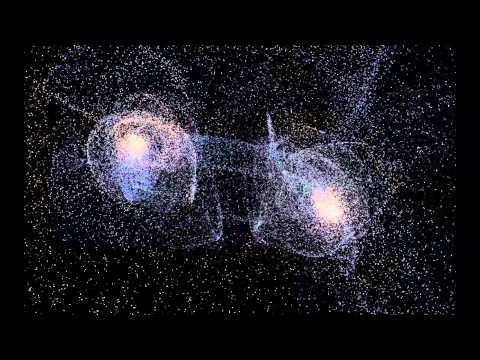

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("7HF5Oy8IMoM")

## Можно ли умножить матрицу на вектор быстрее $\mathcal{O}(n^2)$?

- Вообще говоря **НЕТ**. 
- Это связано с тем, что мы имеем $\mathcal{O}(n^2)$ входных данных, поэтому для произвольной матрицы быстрее выполнить умножение нельзя.
- К счастью, мы можем  умножать матрицу на вектор быстрее <font color='red'>для определённого класса матриц</font>.
Например:

    * <font color='red'>Малоранговые</font> матрицы (или матрицы с малоранговыми блоками)

    * <font color='red'>Разреженные</font> матрицы с $\mathcal{O}(n)$ ненулевыми элементами

    * <font color='red'>Структурированные</font> матрицы:
      * Фурье
      * Циркулянтные
      * Тёплицевы 
      * Ганкелевы

## Произведение матриц

Рассмотрим композицию линейных операторов:

1. $y = Bx$
2. $z = Ay$

Тогда, $z = Ay =  A B x = C x$, где $C$ – **произведение двух матриц**.

## Классическое определение

**Определение**. Произведение матрицы $A$ размера $n \times k$ и матрицы $B$ размера $k \times m$ – это матрица $C$ размера $n \times m$ такая что её элементы записываются как 
$$
   c_{ij} = \sum_{s=1}^k a_{is} b_{sj}, \quad i = 1, \ldots, n, \quad j = 1, \ldots, m 
$$

Для $m=k=n$ сложность наивного алгоритма составляет $2n^3 - n^2 =$ <font color='red'>$\mathcal{O}(n^3)$</font>. 

## Обсуждение

- Умножение матриц – это основная операция, необходимая для почти всех эффективных алгоритмов в вычислительной линейной алгебре.

- Говоря нестрого, все алгоритмы для решения задач вычислительной линейной алгебры с плотными матрицами сводятся к последовательности умножений матриц.

- Повышение эффективности умножения матриц, пропорционально увеличивает эффективность алгоритмов, которые используют эту операцию (то есть почти всех).

- Однако реализация быстрых методов для умножения матриц – непростая задача!

## Эффективная реализация алгоритмов вычисления произведения матриц

**Вопрос**: Легко ли вычислить произведение матриц наиболее эффективным образом?

## Ответ: нет, это не легко!

Если вы хотите вычислить произведение как можно быстрее, используя обычный компьютер.

## Демо

Сравним время вычисления произведения матриц для следующих реализаций

- стандартная функция `np.dot()`
- рукописная реализация алгоритма 
- Numba версия рукописной реализации

In [1]:
import numpy as np
def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]  
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
                
    return c

In [2]:
import numpy as np
from numba import jit # Just-in-time compiler for Python, see http://numba.pydata.org 

@jit(nopython=True)
def numba_matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
    return c

Теперь давайте сравним время вычислений.

Попробуйте угадать ответ :)

In [4]:
n = 100
a = np.random.randn(n, n)
b = np.random.randn(n, n)

%timeit matmul(a, b)
%timeit numba_matmul(a, b)
%timeit np.dot(a, b)

import jax.numpy as jnp
a_jax = jnp.array(a)
b_jax = jnp.array(b)
%timeit jnp.dot(a, b).block_until_ready()

383 ms ± 8.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
784 µs ± 593 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
98.2 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
49.1 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Для всех ли размерностей выполнены такие соотношения?

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

dim_range = [10*i for i in range(1, 11)]
time_range_matmul = []
time_range_numba_matmul = []
time_range_np = []
for n in dim_range:
    print("Dimension = {}".format(n))
    a = np.random.randn(n, n)
    b = np.random.randn(n, n)

    t = %timeit -o -q matmul(a, b)
    time_range_matmul.append(t.average)
    t = %timeit -o -q numba_matmul(a, b)
    time_range_numba_matmul.append(t.average)
    t = %timeit -o -q np.dot(a, b)
    time_range_np.append(t.average)

Dimension = 10
Dimension = 20
Dimension = 30
Dimension = 40
Dimension = 50
Dimension = 60
Dimension = 70
Dimension = 80
Dimension = 90
Dimension = 100


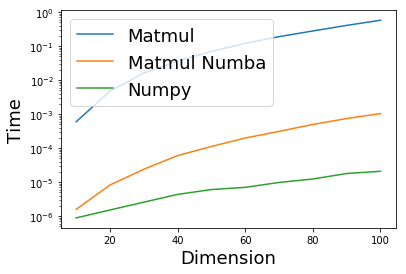

In [11]:
plt.plot(dim_range, time_range_matmul, label="Matmul")
plt.plot(dim_range, time_range_numba_matmul, label="Matmul Numba")
plt.plot(dim_range, time_range_np, label="Numpy")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

## Почему наивная реализация такая медленная?

Это так по двум причинам:

- Она не использует преимуществ быстрой памяти (кэшей) и в целом архитектуру памяти
- Она не использует параллелизм (особенно важно для GPU)

## Архитектура памяти  
<img width=80% src="./Memory-Hierarchy.jpg">

- "Быстрой" памяти мало
- "Медленной" памяти много

## Реализация алгоритмов наиболее вычислительно интенсивным образом

<font color='red'>**Эффективные реализации для задач NLA**</font> используют блочные версии алгоритмов. <br>

Эта идея лежит в основе **[BLAS (Basic Linear Algebra Subroutines)](http://www.netlib.org/blas/)**, написанной на Фортране много лет назад, однако до сих пор не потерявшей актуальность. 

Разделим матрицу на блоки! Для примера рассмотрим разбиение на блочную матрицу размера $2 \times 2$:

$$
   A = \begin{bmatrix}
         A_{11} & A_{12} \\
         A_{21} & A_{22}
        \end{bmatrix}, \quad B = \begin{bmatrix}
         B_{11} & B_{12} \\
         B_{21} & B_{22}
        \end{bmatrix}$$

Тогда  

$$AB = \begin{bmatrix}A_{11} B_{11} + A_{12} B_{21} & A_{11} B_{12} + A_{12} B_{22} \\
            A_{21} B_{11} + A_{22} B_{21} & A_{21} B_{12} + A_{22} B_{22}\end{bmatrix}.$$  

Если $A_{11}, B_{11}$ и их произведение помещается в кэш-память (которая достигает 12 Мб (L3) в [последнем CPU от Intel](https://en.wikipedia.org/wiki/List_of_Intel_microprocessors#Desktop)), тогда мы только один раз загружаем их в память.  

## BLAS

BLAS имеет три уровня:
1. BLAS-1,  операции типа $c = a + b$
2. BLAS-2, операции типа умножения матрицы на вектор
3. BLAS-3, произведение матриц

**Q:** Какова принципиальная разница между ними?

**A:** основная разница в соотношении между количеством операций и количеством данным!

1. BLAS-1: $\mathcal{O}(n)$ данных, $\mathcal{O}(n)$ операций
2. BLAS-2: $\mathcal{O}(n^2)$ данных, $\mathcal{O}(n^2)$ операций
3. BLAS-3: $\mathcal{O}(n^2)$ данных, $\mathcal{O}(n^3)$ операций

## Почему BLAS так важна и актуальна?

1. Стандартные реализации базовых операций линейной алгебры
2. Сохраняются стандартные имена для всех операций, сохраняющиеся в каждой новой реализации (например [ATLAS](https://www.netlib.org/atlas/), [OpenBLAS](https://www.openblas.net/), [MKL](https://software.intel.com/en-us/mkl)). Вы можете вызвать функцию умножения матриц (GEMM) в вашем коде, слинковать его с любой реализацией BLAS, и всё будет корректнро работать
3. Позволяет формулировать новые алгоритмы в терминах BLAS операций – гарантии скорости
4. Есть обёртки для большинства популярных языков

## Реализации BLAS и их использование

1. [ATLAS](http://math-atlas.sourceforge.net) - Automatic Tuned Linear Algebra Software. Она автоматически адаптируется под архитектуру конкретного компьютера.
2. [LAPACK](http://www.netlib.org/lapack/) - Linear Algebra Package. Она выполняет высокоуровневые операции (например матричные разложения), которые опираются на вызовы функций из BLAS.
3. [Intel MKL](https://software.intel.com/en-us/intel-mkl) - Math Kernel Library. Эта реализация является оптимизированной версией BLAS и LAPACK для процессоров Intel. Доступна в Anaconda: 
```
conda install mkl
```
MATLAB использует Intel MKL по умолчанию.

4. OpenBLAS – это оптимизированная версия BLAS, основанная на [GotoBLAS](https://en.wikipedia.org/wiki/GotoBLAS). 

5. PyTorch [поддерживает](https://pytorch.org/docs/stable/torch.html#blas-and-lapack-operations) некоторые вызовы из BLAS и LAPACK

6. Для GPU реализован [cuBLAS](https://docs.nvidia.com/cuda/cublas/index.html).

Для сравнения производительности OpenBLAS и Intel MKL, см [этот обзор](https://software.intel.com/en-us/articles/performance-comparison-of-openblas-and-intel-math-kernel-library-in-r)


## Список операций в BLAS (исходник [тут](https://www.netlib.org/blas/blasqr.pdf))

<img src="./blas_funcs.png">


## Более быстрые алгоритмы для умножения матриц

Напомним, что сложность алгоритма матричного умножения $\mathcal{O}(n^3)$ операций.
Однако, данных требуется только $\mathcal{O}(n^2)$.

**Q:** возможно ли уменьшить число операций необходимое для умножения матриц до $\mathcal{O}(n^2)$?

## Что успели сегодня

- Что такое производительность и в чём она измеряется?
- Операция умножения матрицы на вектор
- Операция умножения матриц
- Иерархия памяти и блочные алгоритмы
- BLAS

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()